Importing Libraries

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

Access MNIST Dataset

In [3]:
mnist = tf.keras.datasets.mnist

In [ ]:
mnist.load_data()

Training and test split

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

Model Creation

In [9]:
model = models.Sequential([
  layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
history =  model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 33ms/step - accuracy: 0.8921 - loss: 0.3383 - val_accuracy: 0.9786 - val_loss: 0.0682
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9849 - loss: 0.0520 - val_accuracy: 0.9847 - val_loss: 0.0496
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9895 - loss: 0.0337 - val_accuracy: 0.9889 - val_loss: 0.0366
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9930 - loss: 0.0240 - val_accuracy: 0.9914 - val_loss: 0.0284
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - accuracy: 0.9945 - loss: 0.0178 - val_accuracy: 0.9916 - val_loss: 0.0281
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 32ms/step - accuracy: 0.9961 - loss: 0.0137 - val_accuracy: 0.9914 - val_loss: 0.0286
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 33ms/step - accuracy: 0.9955 - loss: 0.0136 - val_accuracy: 0.9906 - val_loss: 0.0327
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9964 -

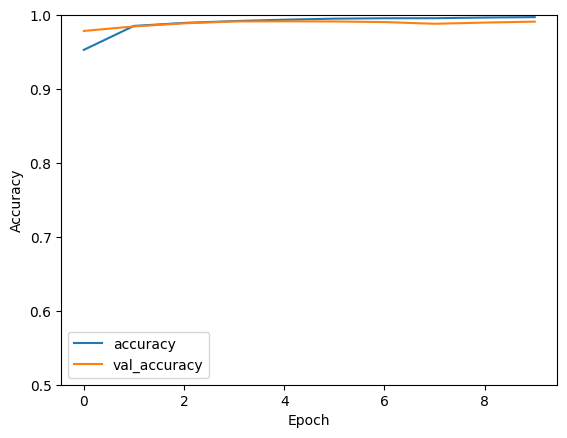

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend()
plt.show()